<a href="https://colab.research.google.com/github/Leena-GO/Self-study/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%2B_%EB%94%A5%EB%9F%AC%EB%8B%9D_04_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04-2 확률적 경사 하강법

## 1. 점진적인 학습
- 훈련 데이터가 한 번에 준비되지 않고 조금씩 전달이 된다면, 모델을 훈련시키는데 어려움이 생길 수 있다.
- 이전에 훈련한 모델을 버리지 않고도 새로운 데이터에 대해 조금씩 훈련을 할 수 있는 방법을 **점진적 학습(온라인 학습)**이라고 한다.


### 1) 확률적 경사 하강법
- 대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법**(Stochastic Gradient Desent)이라고 한다.
  -  *확률적* == *무작위하게, 랜덤하게*
    - 훈련 세트를 사용하여 모델을 훈련하므로, 경사하강법도 훈련 세트를 사용해서 가장 가파른 길을 찾게 된다.
    - 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라서 가장 가파른 길을 찾는다.
  - *경사 == 기울기*
  - *하강법 == 내려가는 방법*
    - 가장 가파른 경사를 따라, 원하는 지점에 도달하는 것이 목표
    - 하지만 조금씩 내려오는 것이 중요하다.
    - 이렇게 내려오는 과정이 경사 하강법 모델을 훈련하는 것이다.


---

- 정리하자면..
  - 훈련 세트에서 랜덤하게 하나의 샘플을 선택해서, 가파른 경사를 조금 내려간다.
  - 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다.
  - 이렇게 전체 샘플을 모두 사용할 때까지 계속 진행한다.
  - 만약 경사를 다 내려가지 못했다면, 훈련 세트에 모든 샘플을 채워넣고, 경사를 처음부터 다시 내려가는데, 만족할만한 위치에 도달할 때까지 계속 내려간다.

  - 확률적 경사 하강법에서 훈련 세트를 (한 번) 모두 사용하는 과정을 **에포크**(epoch)라고 한다.
    - 일반적으로 경사 하강법은 수십, 수백 번 이상의 에포크를 수행한다. 

---

- **미니배치 경사 하강법** (Minibatch gradient descent): 무작위로 몇 개의 샘플을 선택하여 경사를 내려가는 방법
- **배치 경사 하강법**(Batch gradient descent): 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방법
  - 전체 데이터를 사용하므로 가장 안정적인 방법
  - 그렇지만 그만큼 컴퓨터 자원을 많이 사용하게 되고, 데이터가 너무 많아 한 번에 전체 데이터를 모두 읽지 못할수도 있다.

---

- 확률적 경사 하강법은 train set를 이용하여 최적의 장소로 조금씩 이동하는 알고리즘이다.
- train data가 모두 준비되어 있지 않아도 학습을 매일 이어나갈 수 있다,
- **신경망 모델**이 확률적 경사 하강법이나 미니배치 경사 하강법을 사용한다.

### 2) 손실 함수 (Loss function)
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준
- 손실함수의 값이 작을수록 좋은 것이나, 어떤 값이 최솟값인지 알 수 없다.
- 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 평가.
- 다행히 많은 문제에 필요한 손실 함수는 이미 정의되어있다.

  - cf) 손실함수 ≒ 비용함수

|손실함수|비용함수|
|:-:|:-:|
|샘플 하나에 대한 손실 정의|훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합|

---

- 만약 예측의 정확도를 손실 함수로 사용하게 될 경우, 4개의 샘플만이 존재할 때 가능한 정확도는 *0, 0.25, 0.5, 0.75, 1* 총 5가지뿐이다.
  - 이렇게 듬성듬성하다면 경사 하강법을 사용할 수 없다.
  - 달리 말하자면, 연속적이어야 경사 하강법을 사용할 수 있는 것이다!

- 연속적인 손실 함수를 만들기 위해, **로지스틱 회귀 모델**이 확률을 출력했을 때처럼 0~1 사이의 값을 설정하도록 해야한다. 


### 3) 로지스틱 손실 함수

- 아래와 같은 상황이라고 가정을 해보자.

|예측|정답(target)|샘플의 예측확률|
|:-:|:-:|:-:|
|1|1|0.9|
|0|1|0.3|
|0|0|0.2|
|1|0|0.8|

- 첫 번째 샘플의 예측은 0.9이므로, 양성 클래스의 타깃인 1과 곱한 다음 음수로 바꿀 수 있다.
  - 0.9 x 1 → -0.9

- 두 번째 샘플의 예측은 0.3이다. 타깃이 양성 클래스인데, 거리가 멀다.
  - 0.3 x 1 → -0.3
  - 첫 번째 샘플보다 높은 손실이 된다!

- 세 번째 샘플의 예측은 0.2이나, 타깃인 음성 클래스를 곱해주면 값이 0이 된다.
- 이를 방지하기 위해, 양성 클래스에 대한 예측으로 변경하여 값을 추출한다.
  - 0.2(음성) → 0.8(양성)
  - 0 → 1
  - 1 x 0.8 → -0.8

---

- 이런 식으로 정리를 해보자면

|예측|정답(target)|샘플의 예측확률|손실|손실 정도|
|:-:|:-:|:-:|:-:|:-:|
|1|1|0.9|-0.9|낮은 손실|
|0|1|0.3|-0.3|높은 손실|
|0|0|0.2|-0.8|낮은 손실|
|1|0|0.8|-0.2|높은 손실|


- 예측 확률을 사용하여 이런 방식으로 계산을 한다면, 연속적인 손실 함수를 얻을 수 있다.
- 여기에서 로그 함수를 더 적용한다면, 최종 손실값은 양수가 되고 이해를 하기 쉬워진다.
- 또한 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에, 손실을 아주 크게 만들어 모델에 큰 영향을 미치게 된다.

---

- 위 손실함수를 **로지스틱 손실 함수**(Logistic loss function) 또는 **이진 크로스엔트로피 손실 함수**(Binary cross-entropy loss function)이라고 한다.

![img.png](https://gombru.github.io/assets/cross_entropy_loss/intro.png)

- 다중 분류에서 사용하는 손실 함수는 **크로스엔트로피 손실 함수**(Cross-entropy loss function)이라고 한다.

## 2. SGDClassifier
- 확률적 경사 하강법을 사용한 분류 모델을 만들어보자.

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [2]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [3]:
#Species 열은 타깃 데이터로 설정
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [5]:
#훈련 세트와 테스트 세트의 특성을 표준화 전처리해준다.
# 꼭 훈련 세트에서 학습한 통계값으로 테스트 세트를 변환해준다!

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- 표준화 전처리 후, 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스인 **SGDClassifier**를 가지고 오자.

In [6]:
from sklearn.linear_model import SGDClassifier

- SGDClassifier의 객체를 만들 때는, 2개의 매개변수를 지정하게 된다.
  - **loss**: 손실 함수의 종류 지정
  - **max_iter**: 수행할 에포크 횟수

In [7]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


- 출력된 훈련 세트와 테스트 세트의 정확도가 낮은걸로 보아, 지정한 반복 횟수 10번이 부족한 것으로 보인다.
- 위에 나온 **ConvergenceWarning: Maximum number of iteration reached before convergence(수렴). Consider increasing max_iter to improve the fit.** 경고는 모델이 충분히 수렴하지 않았음을 나타내는 경고이다. max_iter 매개변수의 값을 늘려주는 것이 좋다.

---

- SGD는 점진적 학습이 가능하다.
  - SGDClassifier 객체를 다시 만들지 않고, **partial_fit()** 메서드를 통해 이어서 훈련해본다.
  - partial_fit() 메서드는 호출할 때마다 1 에포크씩 이어서 훈련한다.

In [8]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


- 에포크를 한 번 더 실행하니 정확도가 향상되었다.
- 하지만 무작정 많이 반복할 수 없으니, 어떤 기준이 필요하다.

##3. 에포크와 과대/과소적합
- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합 혹은 과대적합이 될 수 있다.

|에포크 횟수가 적은 경우|에포크 횟수가 많은 경우|
|:-:|:-:|
|모델이 훈련 세트를 덜 학습함|모델이 훈련 세트에 아주 잘 맞게 됨|
|훈련 세트와 테스트 세트에 잘 맞지 않는 **과소적합** 모델일 가능성 존재|훈련 세트에 너무 잘 맞아서 테스트 세트에는 오히려 점수가 나쁜 **과대적합** 모델일 수 있음|

- 과대적합이 시작하기 전에 훈련을 멈추는 것을 ***조기 종료**(early stopping)이라고 한다.

---

- 이 예제에서는 fit()메서드를 사용하지 않고, *partial_fit()* 메서드만 사용한다.
  - partial_fit() 메서드만 사용하기 위해서는, 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해주어야 한다.
  - 이를 위해, np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만들어준다.
  - 에포크마다 훈련 세트와 테스트 세트의 점수를 기록하기 위해 2개의 리스트를 준비한다. 

In [9]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []

classes = np.unique(train_target)

In [10]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [11]:
#300번의 에포크 동안 훈련을 반복하여 진행한다.

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

- Python의 **_** 는 특별한 변수이다. 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용한다.

--- 

300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려보자.

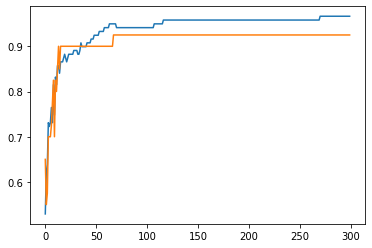

In [12]:
import matplotlib.pyplot as plt

plt.plot(train_score) #파랑색
plt.plot(test_score) #주황색
plt.show()

- 백 번째 에포크 이후에 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다.
- 에포크 초기에는 과소적합 되어 훈련 세트와 테스트 세트의 점수가 낮다.
- 이 모델의 경우, 백 번째 에포크가 적절한 반복 횟수로 보인다.
- 그럼 SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련해보자.

In [13]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42) 
#tol 매개변수에서 향상될 최솟값을 지정한다. tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter = 100만큼 무조건 반복하도록 만든다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- 최종 점수가 좋다.
- 훈련 세트와 테스트 세트에서의 정확도 점수가 비교적 높게 나왔다.